# Neural Networks Skills Session
*Notebook for my skills session on neural networks on 2024-03-01*

The aims for this skills session are to:
- Give you an idea of what a neural network actually is
- Show you what the caveats are (they aren't actually magic)
- Get you training a neural network to emulate simple stellar evolution data


Get started with some imports:

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1 Neural network basics
Neural networks are a type of machine learning model which learn to reproduce patterns from the data they are trained on.

They consist of a series of interconnected ***layers*** which are populated by one or more ***neurons***. Inputs are passed through :

***IMAGE OF HORRIBLE FULLY CONNECTED LAYERS HERE***

Seeing diagrams like this might be what has stopped you from looking any further into learning how to train your own neural networks, but I promise it really isn't as bad as it looks!

## 1.1 What are neurons?
Each node in the image above is a singe neuron in an example network.

Let's take a look at what a neuron looks like for a single-input network:

***NEURON IMAGE HERE, SINGLE INPUT***

To get an output $y$ from some input $x$, we just apply a linear transformation of the form
\begin{equation}
  y = f(wx+b),
\end{equation}
where $w$ is a ***weight*** term, $b$ is a ***bias*** term. ($f(\cdot)$ is the ***activation function***, we'll come back to this later!)

A neural network consisting of a single layer, with a single neuron, and a linear activation function (i.e $f(a) = a$) is just optimising a linear fit by tuning the neuron weights and biases.

Let's see how this looks:

In [14]:
def linear_fit(weight, bias):
  ##### generate inputs #####
  x = np.random.rand(1000)

  ##### generate outputs #####
  y = weight*x + bias

  ##### create tensorflow model #####
  tf.keras.backend.clear_session()
  linear_model = tf.keras.Sequential()#instantiate model

  linear_model.add(tf.keras.Input(1,))#input layer

  linear_model.add(tf.keras.layers.Dense(units=1, activation="linear",))#single dense layer, single neuron, linear activation

  linear_model.compile(loss='mse')

  linear_model.fit(x,y,epochs=50,batch_size=10, verbose=0)

  ##### print neuron weights and biases #####
  print("linear model weight = " + str(linear_model.layers[0].get_weights()[0]))
  print("linear model bias = " + str(linear_model.layers[0].get_weights()[1]))

weight= 0.5 #<--- input value here
bias = 0.8 #<--- input value here

linear_fit(weight, bias)

linear model weight = [[0.49981344]]
linear model bias = [0.79993695]


In many cases, we'll have more than one input into our networks ($\textbf{x}$).

Then our single neuron takes this form:

***NEURON IMAGE HERE, MANY INPUTS***

And our linear transformation just becomes
\begin{equation}
  y = f(\textbf{w} \cdot \textbf{x} +b),
\end{equation}
where $\textbf{w}$ contains multiple weights.

Let's see how our simple one neuron network copes with multiple inputs:


In [15]:
def linear_fit(weights, bias):
  ##### generate inputs and outputs #####
  dataset_size=1000
  inputs={}
  output=np.full(dataset_size, bias)

  for idx in range(len(weights)):
    x = np.random.rand(dataset_size)
    inputs[f'x{idx}'] = x
    output += weights[idx]*x

  ##### create tensorflow model #####
  tf.keras.backend.clear_session()
  linear_model = tf.keras.Sequential()#instantiate model

  linear_model.add(tf.keras.Input(len(weights),))#input layer

  linear_model.add(tf.keras.layers.Dense(units=1, activation="linear",))#single dense layer, single neuron, linear activation

  linear_model.compile(loss='mse')

  linear_model.fit(np.column_stack([inputs[f'x{idx}'] for idx in range(len(weights))]),output,epochs=100,batch_size=10, verbose=0)

  ##### print neuron weights and biases #####
  print("linear model weights = " + str(linear_model.layers[0].get_weights()[0]))
  print("linear model bias = " + str(linear_model.layers[0].get_weights()[1]))

weights= [0.5,0.8,-0.4,-0.2] #<--- input values here
bias = 0.3 #<--- input value here

linear_fit(weights, bias)

linear model weights = [[ 0.50016195]
 [ 0.8001223 ]
 [-0.39946705]
 [-0.19962049]]
linear model bias = [0.30025494]


This looks good so far, but what if we want to start building up our network with more neurons to fit more complex functions?

Let's go back to our model from the start, linking a single input $x$ to a single output $y$, but this time pass $x$ through three neurons, $n_1, n_2,$ and $n_3$, instead of just one.

Given we know now what each neuron is doing, it's easy to construct a function linking $x$ to $y$:

\begin{equation}
y = f(w_3f(w_2f(w_1x+b_1)+b_2)+b_3).
\end{equation}

Now we know what is happening within each neuron, let's move on to the activation function.

## 1.2 Activation functions
Activation functions are used to introduce non-linearities into neural networks to allow us to fit more complex functions.

Before, we just used a linear activation function of the form
\begin{equation}
f(\textbf{w}\cdot\textbf{x} + b) = \alpha(\textbf{w}\cdot\textbf{x} + b) + \beta,
\end{equation}
where $(\alpha, \beta) = (1,0)$.

It turns out linear activation functions aren't a good choice if we're looking for non-linearity!

If we take our equation for a series of neurons from before:

\begin{equation}
y = \alpha w_3(\alpha w_2(\alpha w_1x + b_3 + \beta) + b_ 2 + \beta) + b_3 + \beta,
\end{equation}

Given that our neuron weights and biases, $w_n$ and $b_n$, and our linear activation function terms, $\alpha$ and $\beta$, are all constants, this equation for our fit collapses down to

\begin{equation}
y = \alpha^3 w_3 w_2 w_1 x + \gamma,
\end{equation}

where $\gamma$ is a constant. It doesn't matter how much we tune our $w_n$ terms here, we're stuck with a linear fit!

Due to its computational efficiency, popular choice is the Rectified Linear Unit (ReLU) function:
\begin{equation}
f(x) = \textrm{max}(0,x),
\end{equation}
Plotting this, we get:

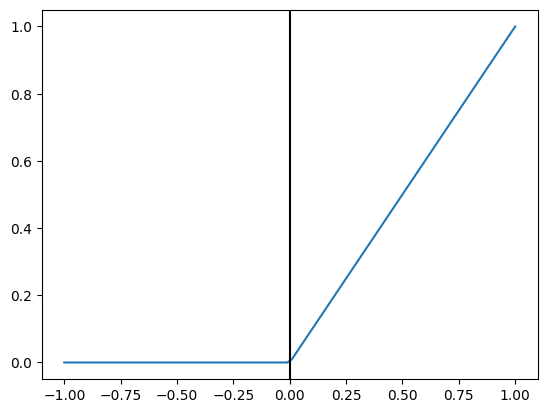

In [7]:
def rectified_linear_unit(x):
  return max(0.0, x)

x = np.linspace(-1,1,100)
y = [rectified_linear_unit(x_val) for x_val in x]
plt.plot(x,y)
plt.axvline(0, color='black')

You might be thinking that this still seems very close to a linear function.

However, ReLU doesn't stick to the condition of a linear function that requires
\begin{equation}
f(x) + f(y) = f(x+y),
\end{equation}
because for ReLU $f(-1) + f(1) \neq f(0)$.

This means we avoid the function for our series of neurons collapsing down to just a linear fit, and we have non-linearity!

Now, by increasing the number of layers in our network, and the number of neurons per layer, we're able to effectively reproduce complex functions present in a dataset used for training.

For the rest of this notebook we'll stick to just using ReLU, but I'll show you a couple of other activation functions here:

In [10]:
### ACTIVATION FUNCTIONS ###

## 1.3) Loss functions
The last part of a basic neural network we need to learn about is the ***loss function*** - this is how our neural network determines how well it is fitting the data.

For a every point in our dataset of $N$ points, each with an $x$ and $y$ value, we show our network the input $x$ and it makes a prediction $\hat{y}$.

A common choice is to take the Mean Squared Error (MSE), averaged over all $N$ points:
\begin{equation}
\textrm{MSE} = \frac{1}{N} \sum_{y=i}^{N} (y_i-\hat{y}_i)^2
\end{equation}

During training, our network tunes the neuron weights and biases in a way that decreases the MSE over the dataset.

I turned off the in-training network printout from the cells for our single neuron, but lets run them again with the printout enabled (setting verbose=1 in model.fit) to see what we get:

In [16]:
def linear_fit(weight, bias):
  ##### generate inputs #####
  x = np.random.rand(1000)

  ##### generate outputs #####
  y = weight*x + bias

  ##### create tensorflow model #####
  tf.keras.backend.clear_session()
  linear_model = tf.keras.Sequential()#instantiate model

  linear_model.add(tf.keras.Input(1,))#input layer

  linear_model.add(tf.keras.layers.Dense(units=1, activation="linear",))#single dense layer, single neuron, linear activation

  linear_model.compile(loss='mse')

  linear_model.fit(x,y,epochs=50,batch_size=10, verbose=1)

  ##### print neuron weights and biases #####
  print("linear model weight = " + str(linear_model.layers[0].get_weights()[0]))
  print("linear model bias = " + str(linear_model.layers[0].get_weights()[1]))

weight= 0.5 #<--- input value here
bias = 0.8 #<--- input value here

linear_fit(weight, bias)

Epoch 1/50
100/100 [==============================] - 1s 2ms/step - loss: 2.2699
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 1.8381
Epoch 3/50
100/100 [==============================] - 0s 1ms/step - loss: 1.4577
Epoch 4/50
100/100 [==============================] - 0s 1ms/step - loss: 1.1248
Epoch 5/50
100/100 [==============================] - 0s 1ms/step - loss: 0.8391
Epoch 6/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5884
Epoch 7/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3893
Epoch 8/50
100/100 [==============================] - 0s 1ms/step - loss: 0.2328
Epoch 9/50
100/100 [==============================] - 0s 1ms/step - loss: 0.1204
Epoch 10/50
100/100 [==============================] - 0s 1ms/step - loss: 0.0508
Epoch 11/50
100/100 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 12/50
100/100 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 13/50
100/100 [====

Hopefully, you should get a series of readouts that look something like this:

> Epoch 1/50\
100/100 [==============================] - 1s 2ms/step - loss: 2.2699\
Epoch 2/50\
100/100 [==============================] - 0s 2ms/step - loss: 1.8381\
Epoch 3/50\
100/100 [==============================] - 0s 1ms/step - loss: 1.4577,

with the 'loss' value decreasing each epoch (each pass through the dataset). This is your neural network learning!

# 2 Neural Network Caveats
Now we know what's going on inside a neural network, let's go over the limitations and the approach we need to take for preparing data for training.


## 2.1 Overfitting
One of the main problems in training neural networks is the risk of our network overfitting on data we used to train our network.

The best way to explain this is graphically. Let's say we have a